In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report


In [2]:
df = pd.read_csv("predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
df.describe() # Statistical Analysis

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [4]:
df.info() # Data type of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df.isna().sum() # No null values present in the data

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
df["Product ID"].value_counts()
df["Product ID"].nunique()

10000

### Type

<Axes: xlabel='Type'>

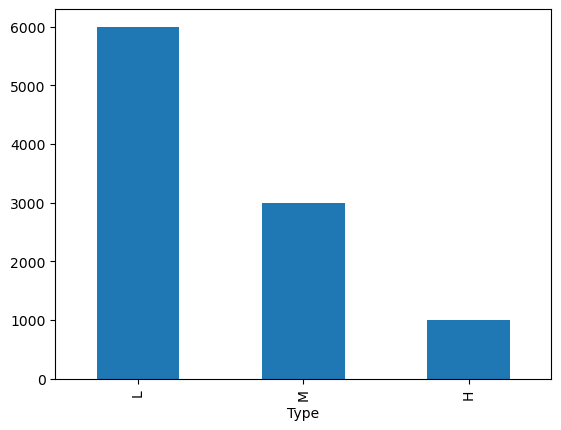

In [7]:
df["Type"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

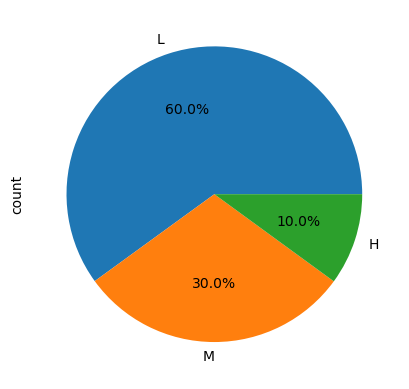

In [8]:
df["Type"].value_counts().plot(kind="pie",autopct="%0.1f%%")

### Air Tempreture

In [9]:
df["Air temperature [K]"].describe()

count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64

<Axes: ylabel='Density'>

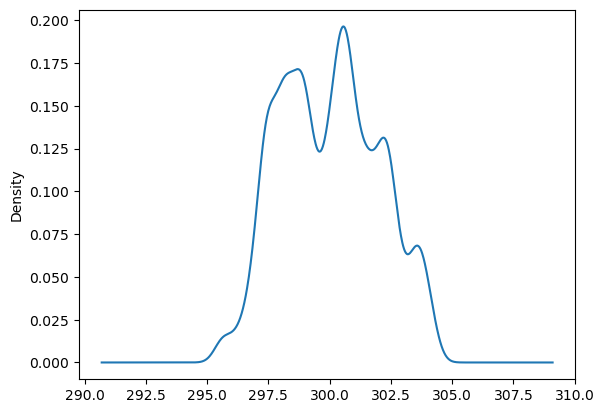

In [10]:
df["Air temperature [K]"].plot(kind="kde")

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

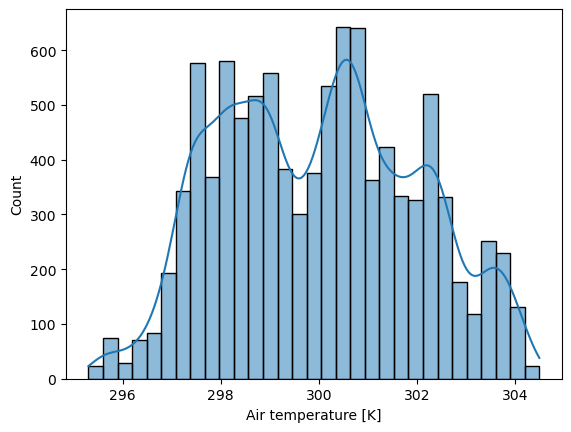

In [11]:
sns.histplot(x=df["Air temperature [K]"],kde=True)

In [12]:
df["Air temperature [K]"].skew() # Looks like [Air temperatur]e is normally distributed

0.11427392052155042

<Axes: xlabel='Air temperature [K]'>

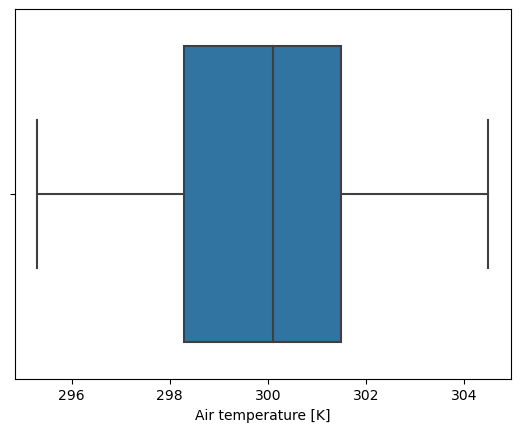

In [13]:
sns.boxplot(x=df["Air temperature [K]"]) # No outliers present in the column

### Process temperature [K]

<Axes: ylabel='Density'>

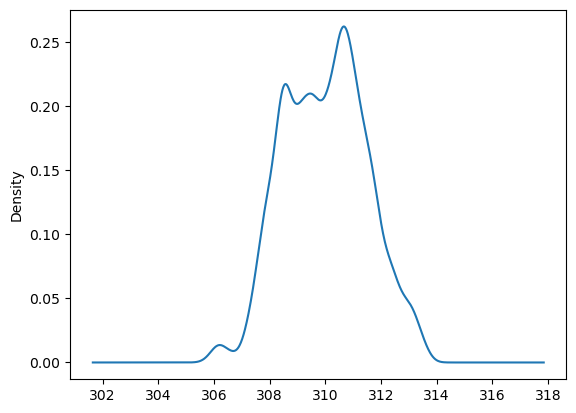

In [14]:
df["Process temperature [K]"].plot(kind="kde")

<Axes: xlabel='Process temperature [K]', ylabel='Count'>

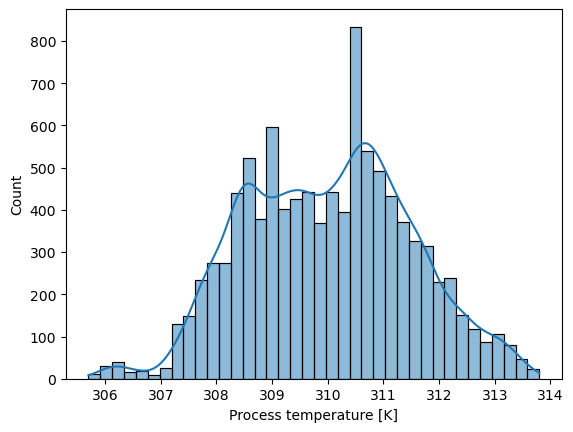

In [15]:
sns.histplot(x=df["Process temperature [K]"],kde=True)

In [16]:
df["Process temperature [K]"].skew() # data is Normally Distributed 

0.015027267769228572

<Axes: xlabel='Process temperature [K]'>

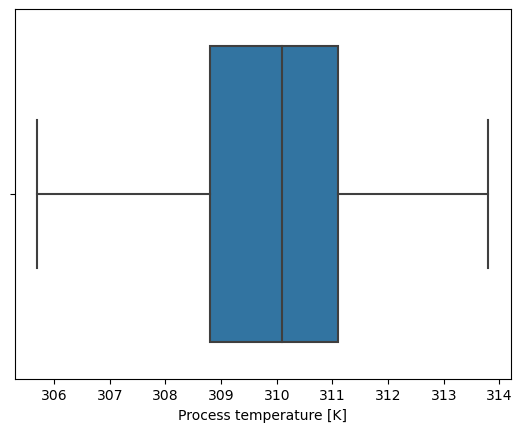

In [17]:
sns.boxplot(x=df["Process temperature [K]"]) # No outliers present in the column

### Rotational speed [rpm]

<Axes: ylabel='Density'>

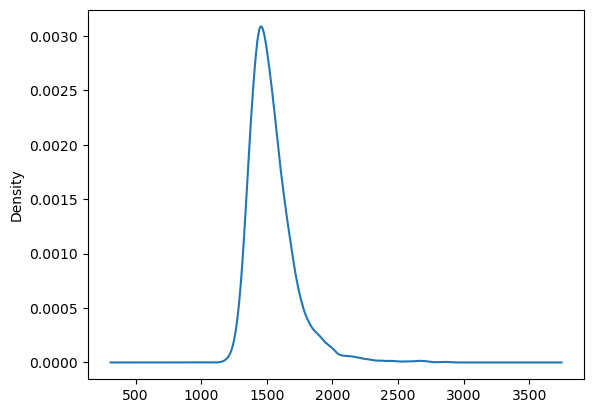

In [18]:
df["Rotational speed [rpm]"].plot(kind="kde")

<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

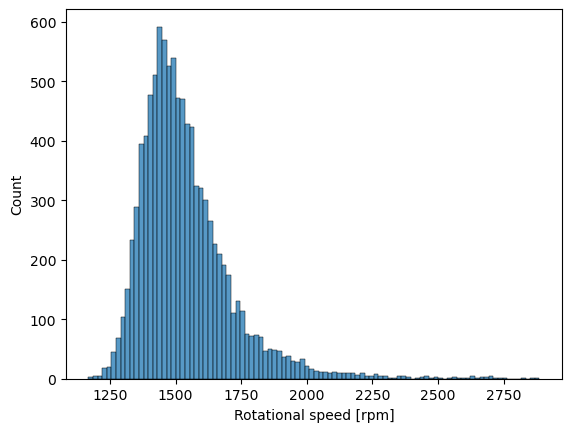

In [19]:
sns.histplot(x=df["Rotational speed [rpm]"])

In [20]:
df["Rotational speed [rpm]"].skew() # Looks like positively skewed data

1.9931710047137523

<Axes: xlabel='Rotational speed [rpm]'>

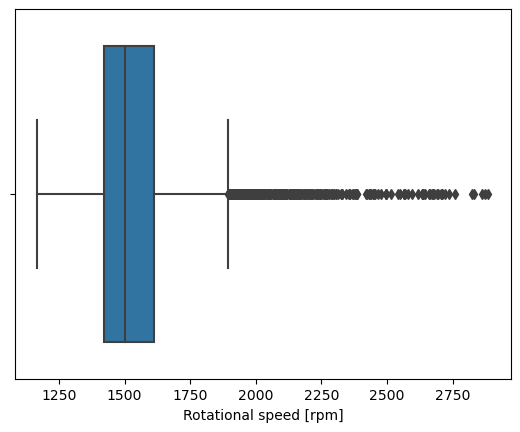

In [21]:
sns.boxplot(x=df["Rotational speed [rpm]"]) # looks like outliers is present in the data

In [22]:
df["Rotational speed [rpm]"].describe()

count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64

In [23]:
df[df["Rotational speed [rpm]"] > 2000]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
14,15,L47194,L,298.6,309.2,2035,19.6,40,0,No Failure
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
194,195,M15054,M,298.2,308.5,2678,10.7,86,1,Power Failure
284,285,L47464,L,298.2,308.3,2051,19.2,90,0,No Failure
298,299,H29712,H,297.9,308.5,2129,18.7,126,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9832,9833,L57012,L,298.4,309.2,2118,17.7,210,0,No Failure
9849,9850,L57029,L,298.6,309.4,2312,15.5,44,0,No Failure
9865,9866,M24725,M,298.9,309.8,2450,13.9,89,0,No Failure


### Torque [Nm]

In [24]:
df["Torque [Nm]"].describe()

count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque [Nm], dtype: float64

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

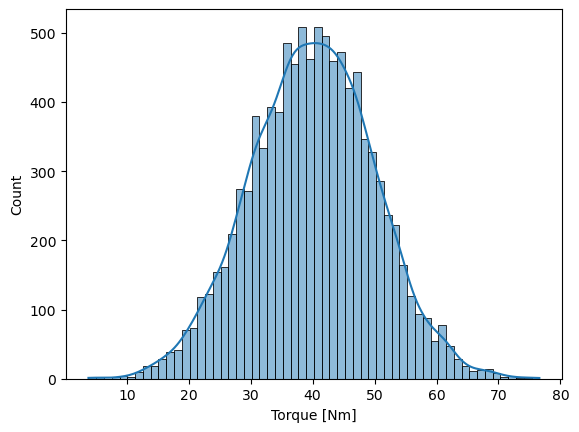

In [25]:
sns.histplot(x=df["Torque [Nm]"],kde=True)

<Axes: ylabel='Frequency'>

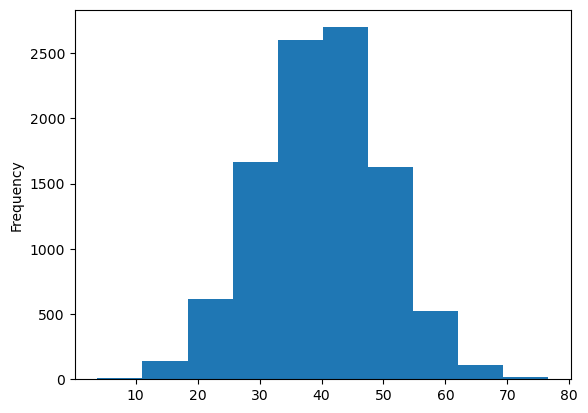

In [26]:
df["Torque [Nm]"].plot(kind="hist")

In [27]:
df["Torque [Nm]"].skew() # data is normally distributed

-0.00951659584005855

<Axes: xlabel='Torque [Nm]'>

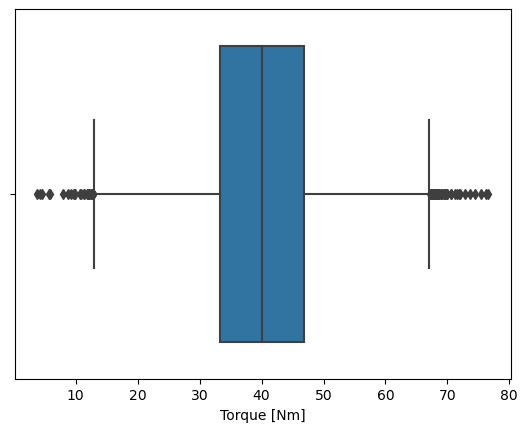

In [28]:
sns.boxplot(x=df["Torque [Nm]"]) # Chances of outliers

### Tool wear [min]

<Axes: ylabel='Frequency'>

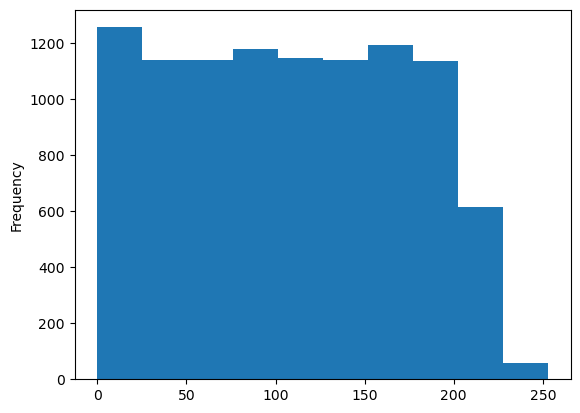

In [29]:
df["Tool wear [min]"].plot(kind="hist")

<Axes: xlabel='Tool wear [min]', ylabel='Count'>

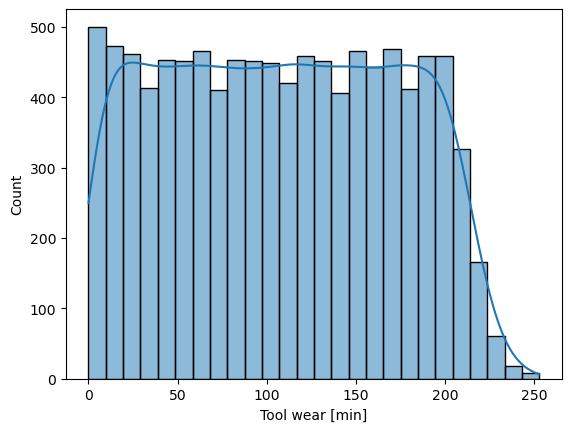

In [30]:
sns.histplot(x=df["Tool wear [min]"],kde=True)

In [31]:
df["Tool wear [min]"].skew() # Data is Normally distributed

0.027292239050452527

<Axes: >

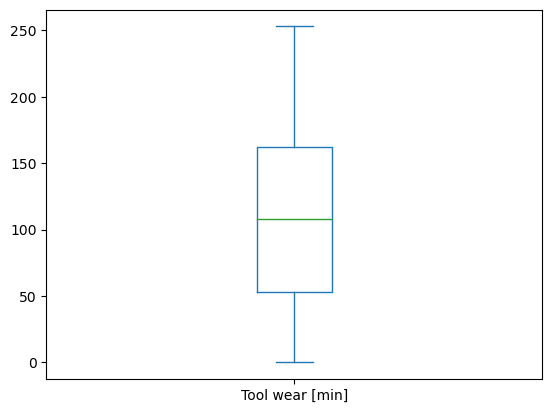

In [32]:
df["Tool wear [min]"].plot(kind="box") 

<Axes: xlabel='Tool wear [min]'>

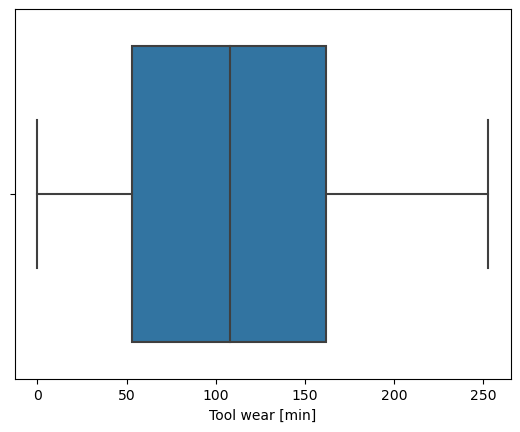

In [33]:
sns.boxplot(x=df["Tool wear [min]"]) # No outliers present in the data

### Failure Type

<Axes: xlabel='Failure Type'>

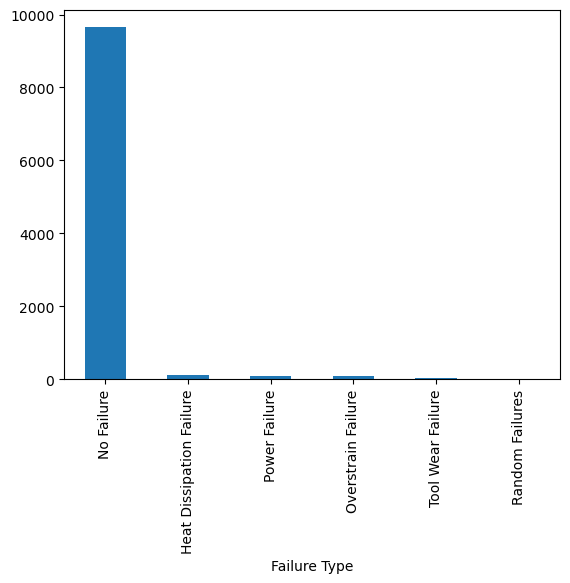

In [34]:
df["Failure Type"].value_counts().plot(kind="bar")

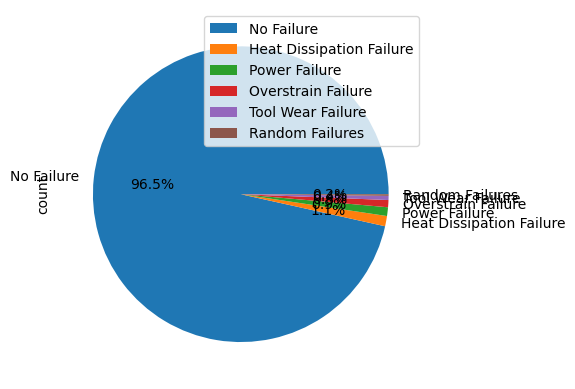

In [35]:
df["Failure Type"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.legend()

### Target

In [36]:
df["Target"].value_counts() # Highly imbalanced data

Target
0    9661
1     339
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

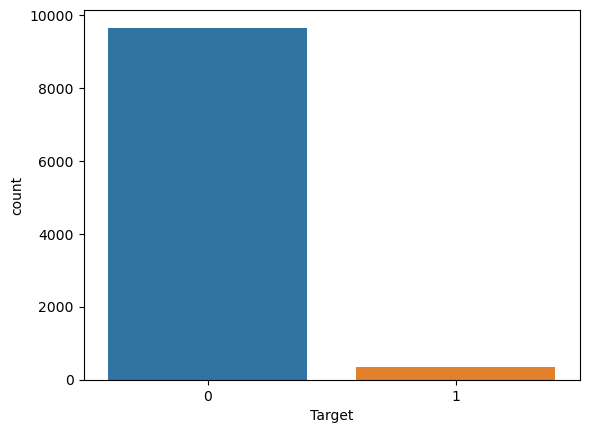

In [37]:
sns.countplot(x=df["Target"]) # Highly imbalanced data

### Bivariate Analysis

In [38]:
pd.crosstab(df["Target"],df["Type"])

Type,H,L,M
Target,,,
0,982,5765,2914
1,21,235,83


In [39]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

<Axes: xlabel='Type', ylabel='Target'>

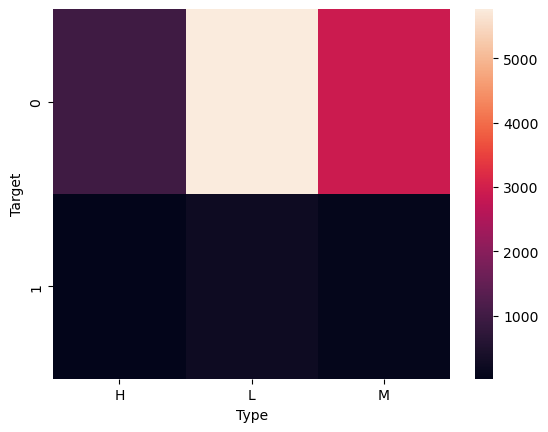

In [40]:
sns.heatmap(pd.crosstab(df["Target"],df["Type"]))

<Axes: xlabel='Target', ylabel='count'>

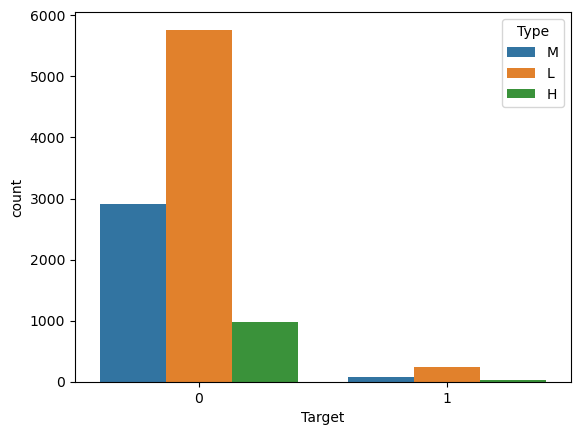

In [41]:
sns.countplot(x=df["Target"],hue=df["Type"])

In [42]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


<Axes: xlabel='Target', ylabel='Air temperature [K]'>

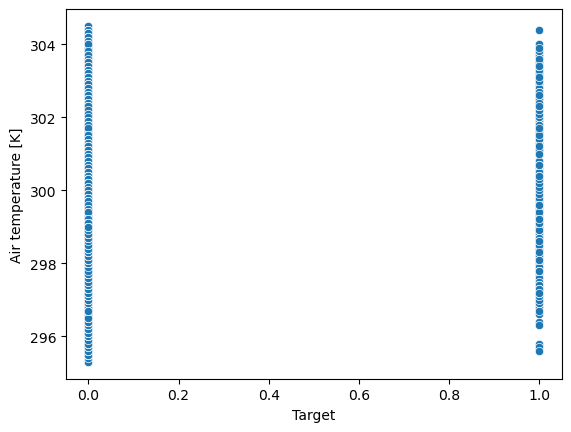

In [43]:
sns.scatterplot(x=df["Target"],y=df["Air temperature [K]"])

<BarContainer object of 10000 artists>

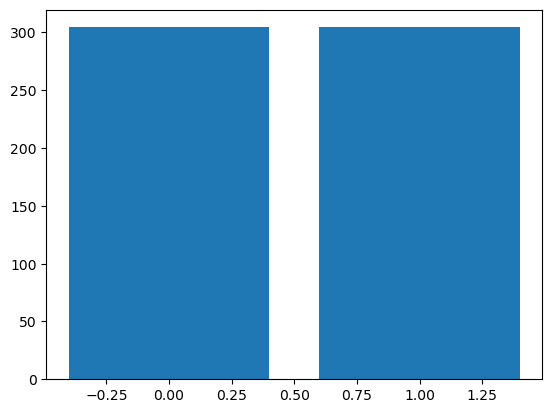

In [44]:
plt.bar(df["Target"],df["Air temperature [K]"])

<BarContainer object of 10000 artists>

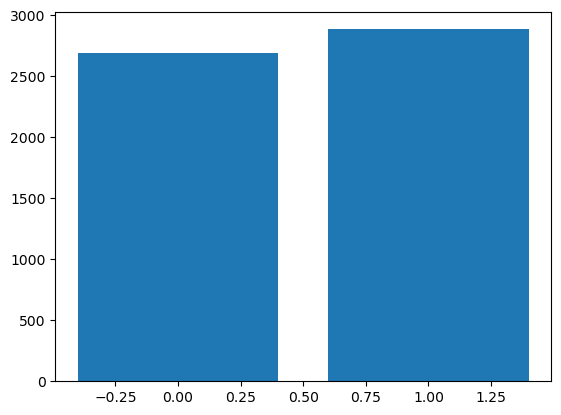

In [45]:
plt.bar(df["Target"],df["Rotational speed [rpm]"])

<Axes: xlabel='Target', ylabel='Air temperature [K]'>

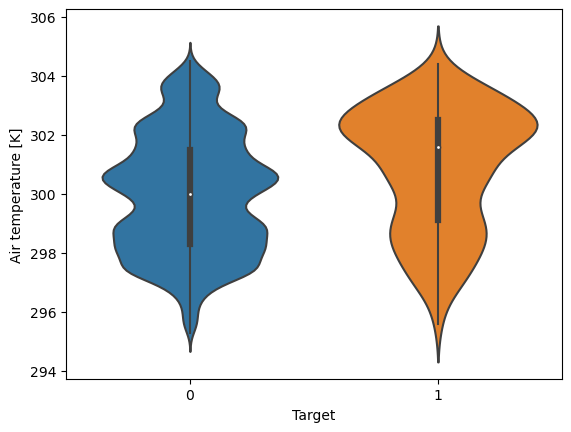

In [46]:
sns.violinplot(x="Target", y="Air temperature [K]", data=df)

<Axes: xlabel='Process temperature [K]', ylabel='Air temperature [K]'>

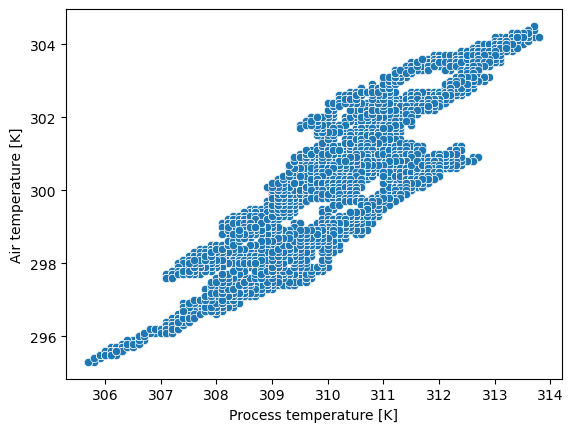

In [47]:
sns.scatterplot(x=df["Process temperature [K]"],y=df["Air temperature [K]"])

### Feature Engineering 

<Axes: xlabel='Torque [Nm]'>

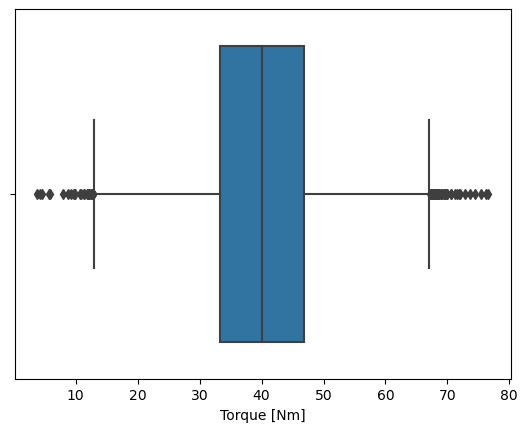

In [48]:
# Torque and rotaional speed contains some outliers
sns.boxplot(x=df["Torque [Nm]"])

In [49]:
df[df["Torque [Nm]"] > 70] # After observing we can not consider these values as outliers

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
603,604,L47783,L,297.9,309.8,1336,71.6,31,1,Power Failure
880,881,M15740,M,295.8,306.3,1235,76.2,89,1,Power Failure
1324,1325,M16184,M,298.8,310.1,1243,74.5,194,1,Power Failure
3000,3001,H32414,H,300.5,309.8,1324,72.8,159,1,Power Failure
4936,4937,L52116,L,303.5,312.4,1284,70.6,94,1,Power Failure
5394,5395,M20254,M,302.8,312.3,1262,70.5,234,1,Power Failure
5615,5616,M20475,M,303.0,312.2,1257,71.3,122,1,Power Failure
6525,6526,L53705,L,301.1,310.4,1312,73.6,49,1,Power Failure
7569,7570,L54749,L,300.2,311.0,1255,71.8,149,1,Power Failure
7763,7764,L54943,L,300.4,311.6,1200,76.6,3,1,Power Failure


In [50]:
df[df["Torque [Nm]"] < 70]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


<Axes: xlabel='Rotational speed [rpm]'>

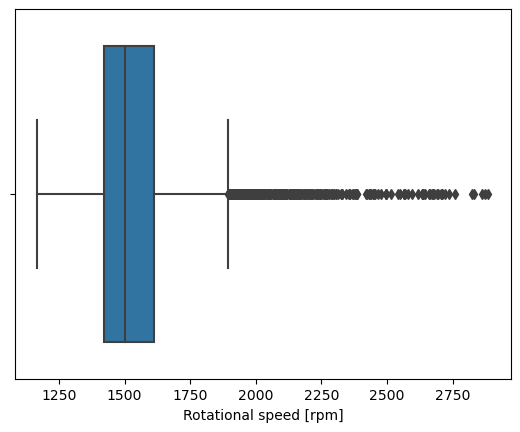

In [51]:
sns.boxplot(x=df["Rotational speed [rpm]"])

In [52]:
df[df["Rotational speed [rpm]"] > 2200]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
194,195,M15054,M,298.2,308.5,2678,10.7,86,1,Power Failure
344,345,M15204,M,297.5,308.2,2448,13.8,29,0,No Failure
380,381,L47560,L,297.5,308.3,2564,12.8,127,1,Power Failure
463,464,L47643,L,297.4,308.7,2874,4.2,118,1,Power Failure
...,...,...,...,...,...,...,...,...,...,...
9732,9733,L56912,L,298.9,310.0,2231,17.4,151,0,No Failure
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9849,9850,L57029,L,298.6,309.4,2312,15.5,44,0,No Failure
9865,9866,M24725,M,298.9,309.8,2450,13.9,89,0,No Failure


In [53]:
df["UDI"].nunique()

10000

In [54]:
df["Product ID"].nunique()

10000

In [55]:
df.drop(columns=["UDI","Product ID"],inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [57]:
pd.crosstab(df["Target"],df["Failure Type"])

Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Target,,,,,,
0,0,9643,0,0,18,0
1,112,9,78,95,0,45


In [58]:
pd.crosstab(df["Failure Type"],df["Target"])

Target,0,1
Failure Type,,
Heat Dissipation Failure,0,112
No Failure,9643,9
Overstrain Failure,0,78
Power Failure,0,95
Random Failures,18,0
Tool Wear Failure,0,45


<Axes: xlabel='Failure Type', ylabel='Target'>

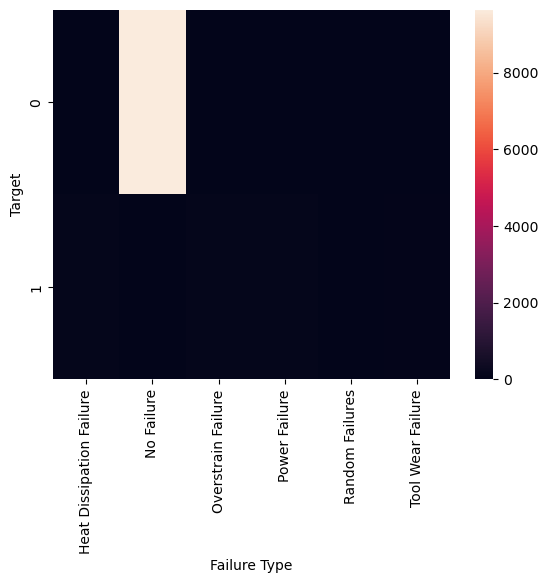

In [59]:
sns.heatmap(pd.crosstab(df["Target"],df["Failure Type"]))

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


### Label Encoding 

In [61]:
df["Type"].replace({"L":0,"M":1,"H":2},inplace=True)

In [62]:
df = pd.get_dummies(df,columns=["Failure Type"])

In [63]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,1,298.1,308.6,1551,42.8,0,0,False,True,False,False,False,False
1,0,298.2,308.7,1408,46.3,3,0,False,True,False,False,False,False
2,0,298.1,308.5,1498,49.4,5,0,False,True,False,False,False,False
3,0,298.2,308.6,1433,39.5,7,0,False,True,False,False,False,False
4,0,298.2,308.7,1408,40.0,9,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,False,True,False,False,False,False
9996,2,298.9,308.4,1632,31.8,17,0,False,True,False,False,False,False
9997,1,299.0,308.6,1645,33.4,22,0,False,True,False,False,False,False
9998,2,299.0,308.7,1408,48.5,25,0,False,True,False,False,False,False


In [64]:
df.info() # Ready to use all features are in numerical form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type                                   10000 non-null  int64  
 1   Air temperature [K]                    10000 non-null  float64
 2   Process temperature [K]                10000 non-null  float64
 3   Rotational speed [rpm]                 10000 non-null  int64  
 4   Torque [Nm]                            10000 non-null  float64
 5   Tool wear [min]                        10000 non-null  int64  
 6   Target                                 10000 non-null  int64  
 7   Failure Type_Heat Dissipation Failure  10000 non-null  bool   
 8   Failure Type_No Failure                10000 non-null  bool   
 9   Failure Type_Overstrain Failure        10000 non-null  bool   
 10  Failure Type_Power Failure             10000 non-null  bool   
 11  Fai

In [65]:
x = df.drop("Target",axis=1)
y = df["Target"]

In [66]:
df["Target"].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

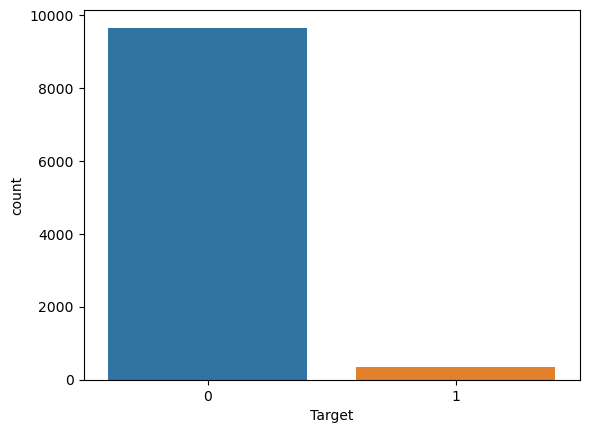

In [67]:
sns.countplot(x=df["Target"]) # Highly imbalanced data

#### Sampling 

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
smt = SMOTE()
x_sampled,y_sampled = smt.fit_resample(x,y)

In [70]:
x_sampled.shape
y_sampled.shape

(19322,)

In [71]:
x_sampled.isna().sum()*100
# y_sampled.info()

Type                                     0
Air temperature [K]                      0
Process temperature [K]                  0
Rotational speed [rpm]                   0
Torque [Nm]                              0
Tool wear [min]                          0
Failure Type_Heat Dissipation Failure    0
Failure Type_No Failure                  0
Failure Type_Overstrain Failure          0
Failure Type_Power Failure               0
Failure Type_Random Failures             0
Failure Type_Tool Wear Failure           0
dtype: int64

### Feature Selection

In [72]:
df.corr().loc["Target"]

Type                                    -0.036715
Air temperature [K]                      0.082556
Process temperature [K]                  0.035946
Rotational speed [rpm]                  -0.044188
Torque [Nm]                              0.191321
Tool wear [min]                          0.105448
Target                                   1.000000
Failure Type_Heat Dissipation Failure    0.568154
Failure Type_No Failure                 -0.959389
Failure Type_Overstrain Failure          0.473324
Failure Type_Power Failure               0.522812
Failure Type_Random Failures            -0.007955
Failure Type_Tool Wear Failure           0.358919
Name: Target, dtype: float64

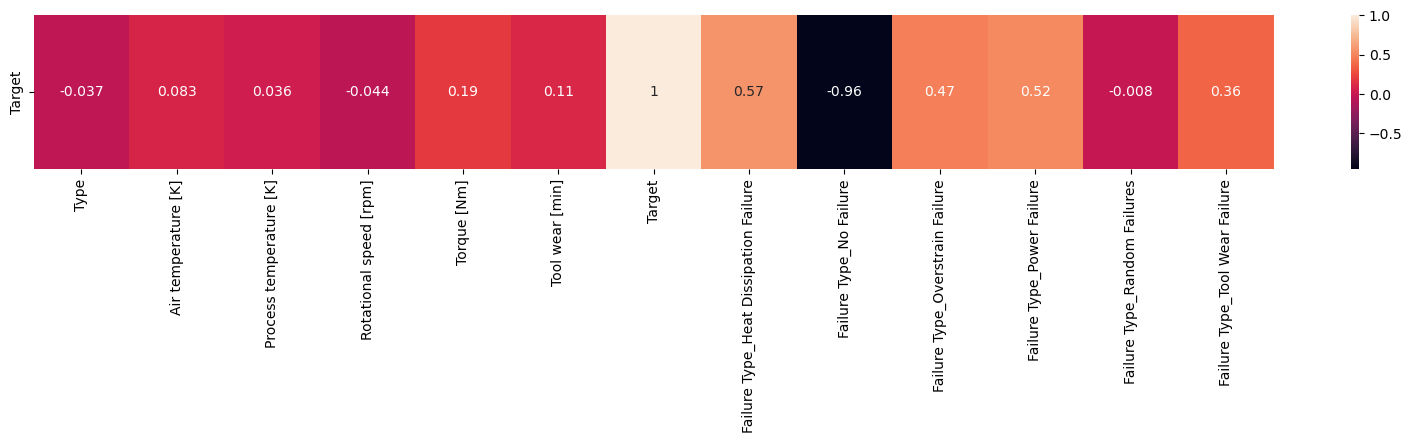

In [73]:
plt.figure(figsize=(20,2))
sns.heatmap(df.corr().loc[["Target"]],annot=True)
  # width X height in inches
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\orchi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


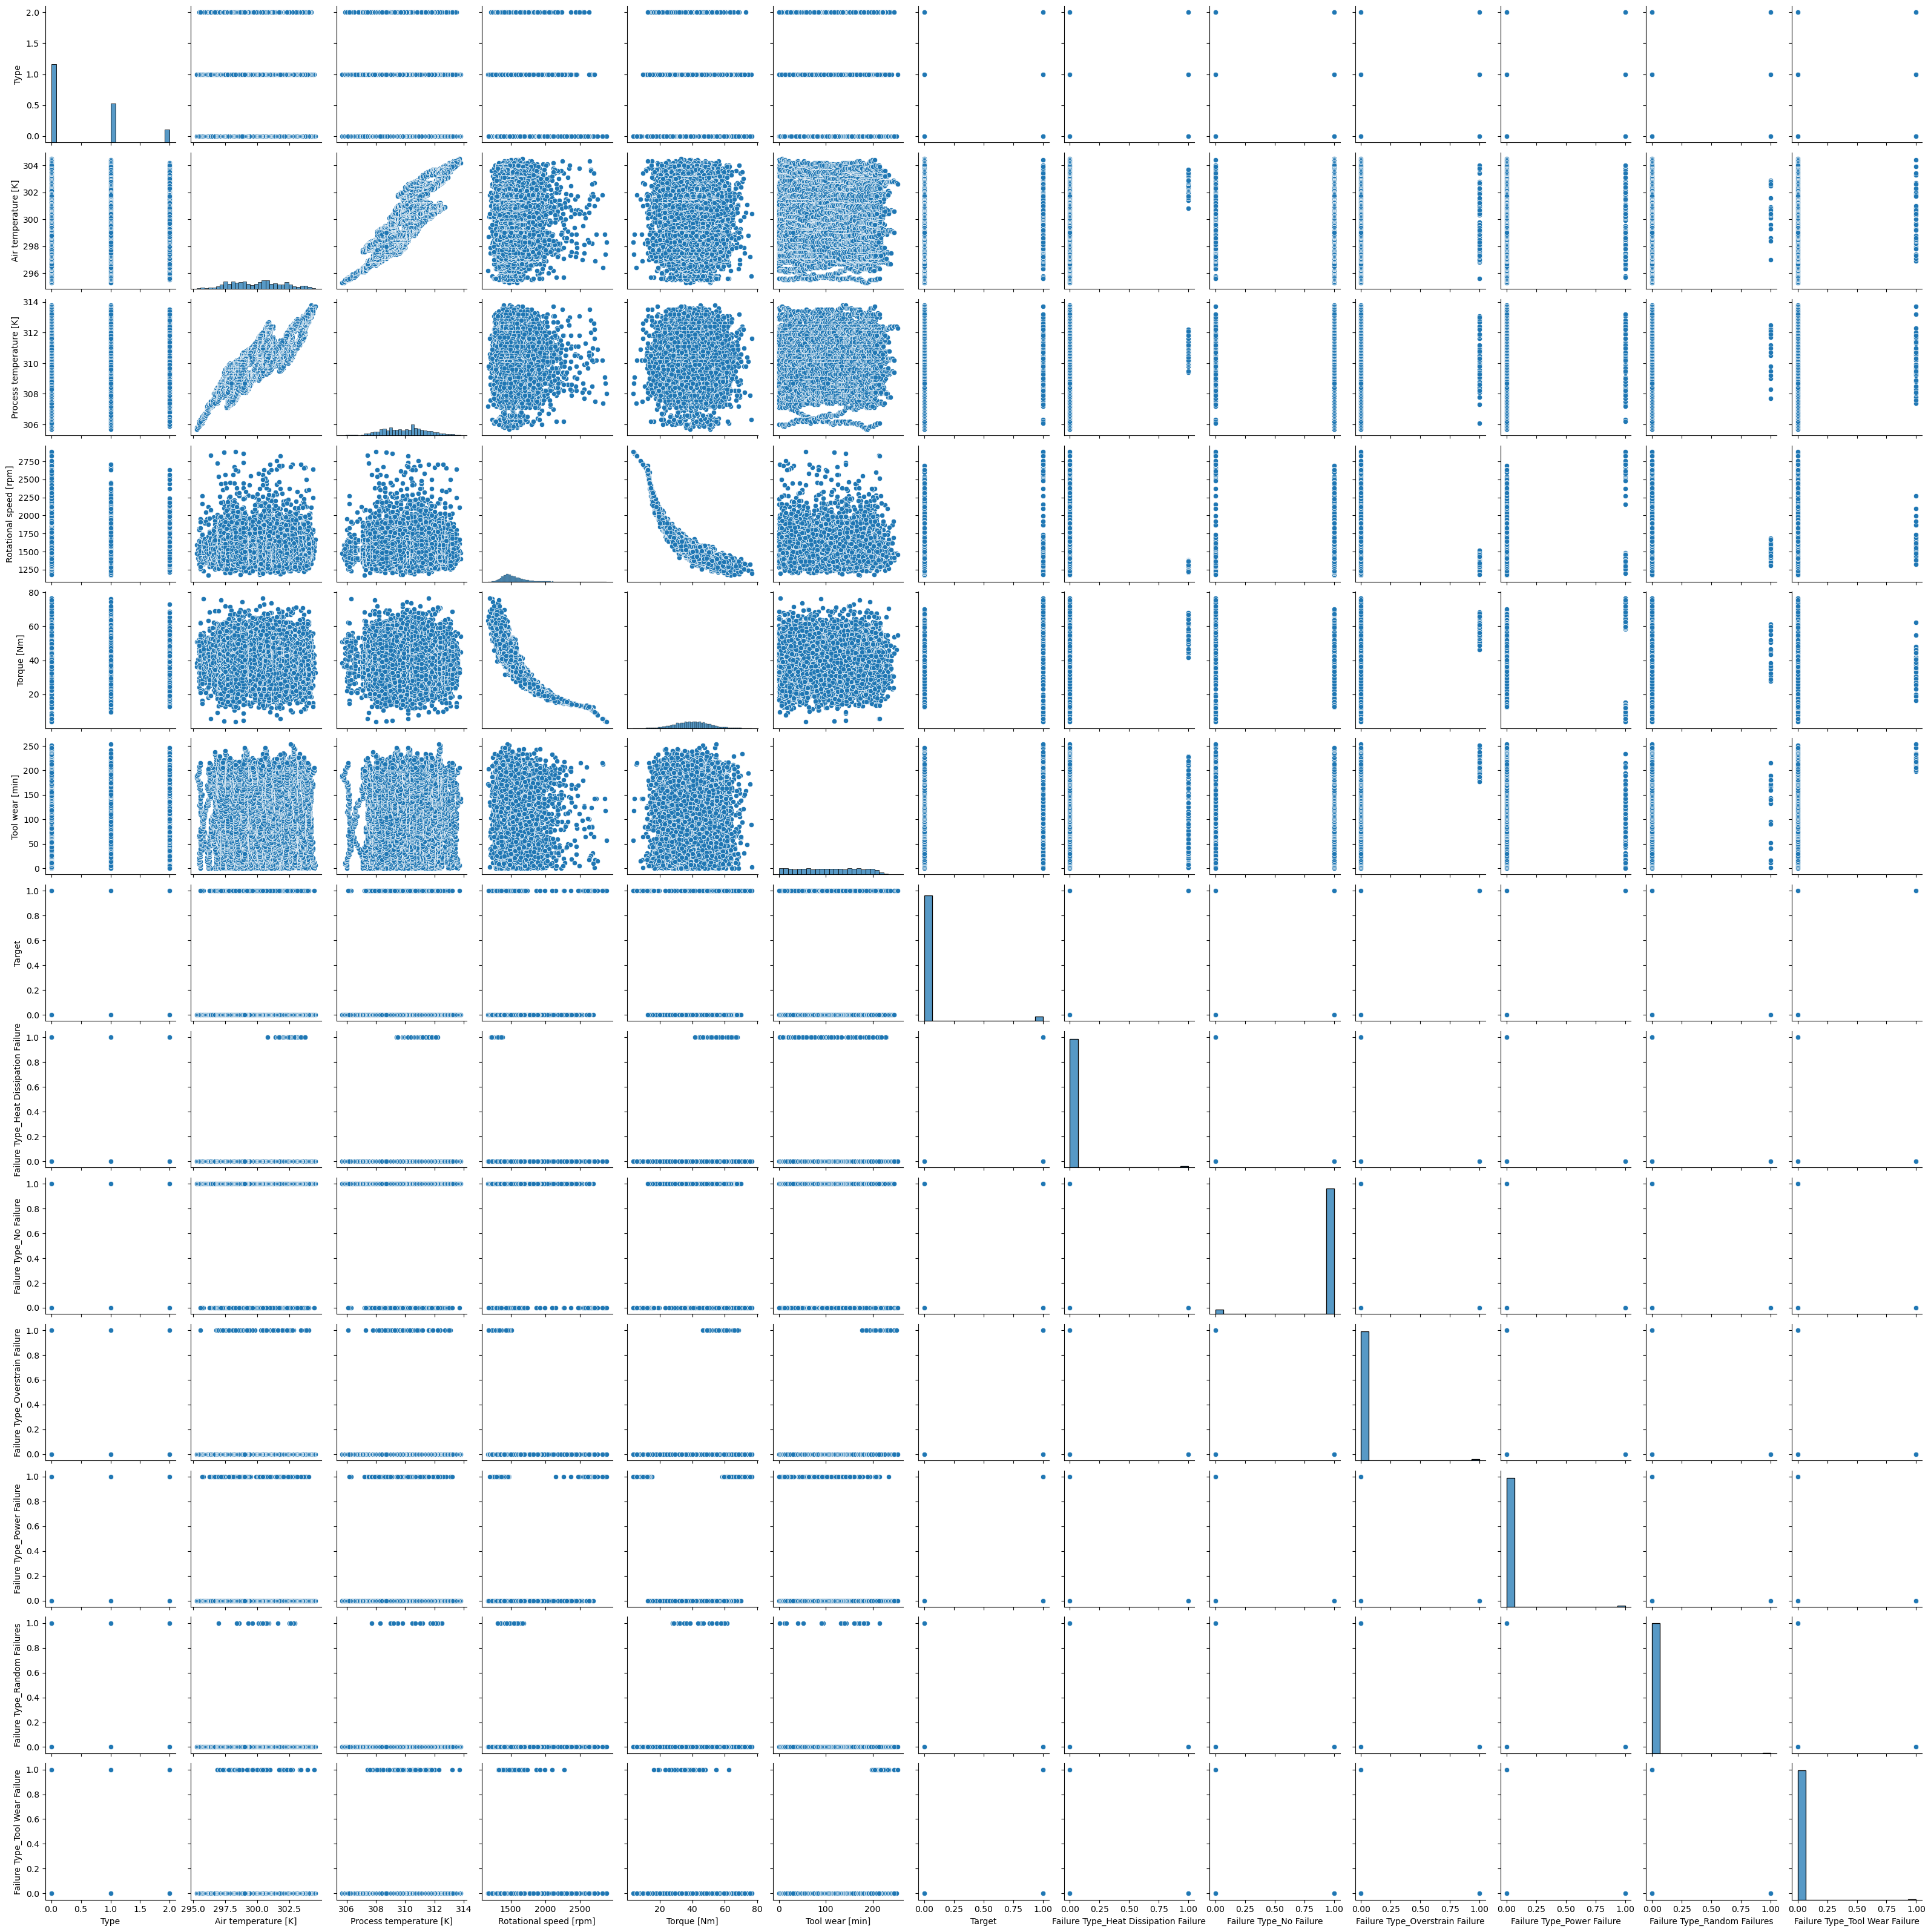

In [74]:
sns.pairplot(df)

### Filter Method

<Axes: >

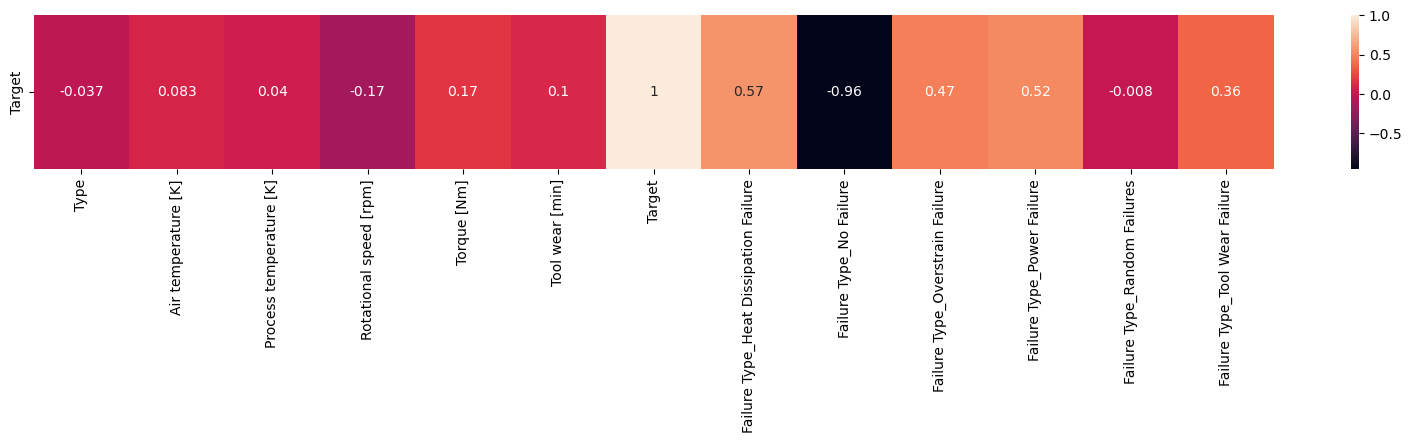

In [75]:
corr = df.corr(method="spearman").loc[["Target"]]
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

<Axes: >

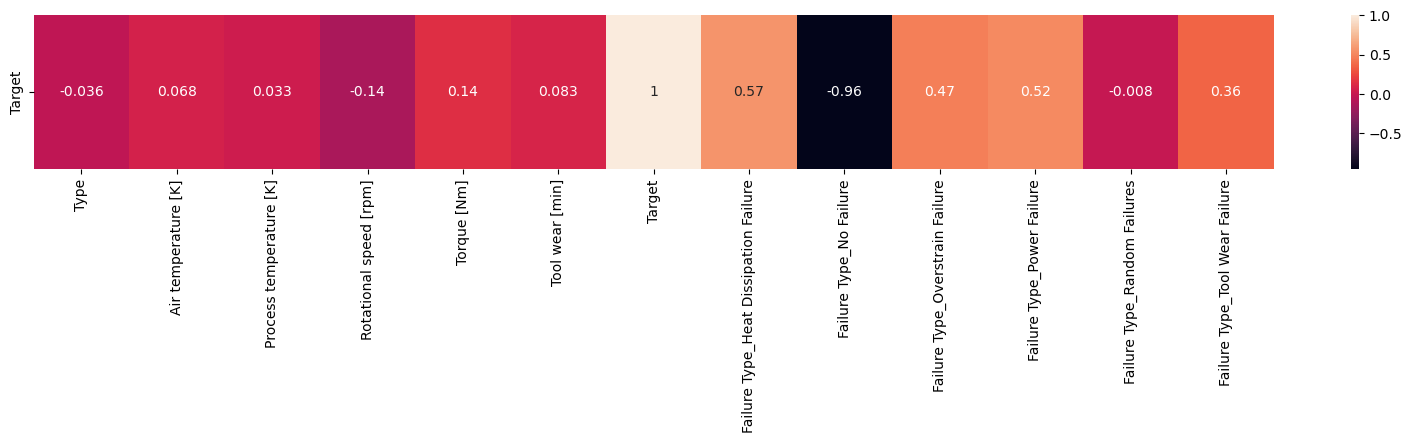

In [76]:
corr = df.corr(method="kendall").loc[["Target"]]
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

### Fisher Score

In [77]:
from skfeature.function.similarity_based import fisher_score

### Train Test Split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5,stratify=y)

### Logistic Regression

In [80]:
from warnings import filterwarnings
filterwarnings("ignore")

In [81]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [82]:
logistic_model.score(x_test,y_test)

0.9985

In [83]:
logistic_model.score(x_train,y_train)

0.998125

In [84]:
y_pred = logistic_model.predict(x_test)

In [91]:
clf_report = classification_report(y_test,y_pred)
print("Classifiaction Report \n",clf_report)
print("=="*60)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score \n",accuracy)
print("=="*60)
cnf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",cnf)

Classifiaction Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       0.99      0.97      0.98        68

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy Score 
 0.9985
Confusion Matrix 
 [[1931    1]
 [   2   66]]


In [93]:
y_pred_train = logistic_model.predict(x_train)

In [95]:
clf = classification_report(y_train, y_pred_train)
print("Classification Report \n", clf)
print("=="*60)

accuracy = accuracy_score(y_train, y_pred_train)
print("accuracy score \n", accuracy)
print("=="*60)

cnf = confusion_matrix(y_train,y_pred_train)
print("confusion matrix \n", cnf)

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       0.97      0.97      0.97       271

    accuracy                           1.00      8000
   macro avg       0.98      0.99      0.99      8000
weighted avg       1.00      1.00      1.00      8000

accuracy score 
 0.998125
confusion matrix 
 [[7721    8]
 [   7  264]]


## DecisionTree

In [86]:
decision_model = DecisionTreeClassifier()
decision_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
decision_model.score(x_test,y_test)

0.9985

In [102]:
y_pred = decision_model.predict(x_test)

clf = classification_report(y_pred, y_test)
print("Calssification report \n", clf)
print("=="*60)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score \n", accuracy)
print("=="*60)

cnf = confusion_matrix(y_pred,y_test)
print("confusion matrix \n", cnf)
print("=="*60)


Calssification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1933
           1       0.97      0.99      0.98        67

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy score 
 0.9985
confusion matrix 
 [[1931    2]
 [   1   66]]


In [99]:
y_pred_train = decision_model.predict(x_train)

clf = classification_report(y_train , y_pred_train)
print("Calssification report \n", clf)
print("=="*60)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy score \n", accuracy)
print("=="*60)


clf = classification_report(y_train, y_pred_train)
print("Calssification report \n", clf)
print("=="*60)


Calssification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      1.00      1.00       271

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Accuracy score 
 1.0
Calssification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      1.00      1.00       271

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



<Axes: >

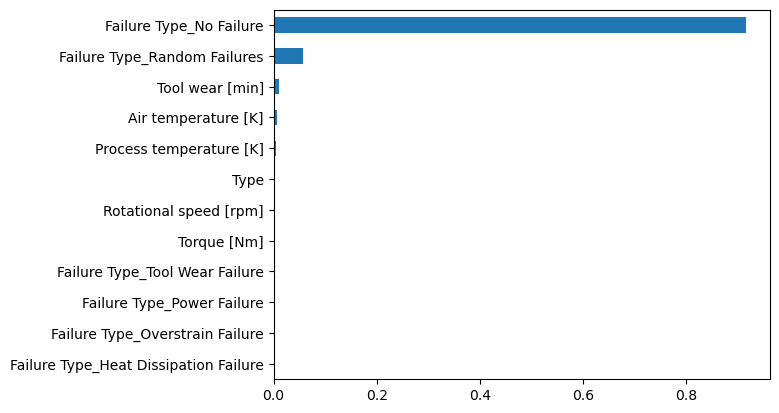

In [100]:
arr1 = decision_model.feature_importances_
s1 = pd.Series(arr1,index=x.columns)
s1.sort_values().plot(kind="barh")